Script to start from the hVCF of the reference, and then add (merging) one by one the others hvcf of the pangenome, and see how many ranges does it increase.

Takes advantage of the phg merge function, in which each file has a key for the range of the pangenome, if its exists, using the reference coordenades.
You can compare each range for the genomes having each range:




cat output/vcf_files/merged_hvcfs_19092024.h.vcf | grep -v "##ALT"      #picking a random range

chr3H_LR890098.1        613549767       .       T       <bd32348136f0502d9356256f7543dc9c>,<78ffc528bd70012d1f75067ecbd7f4e8>   .       .       END=613553517   .............................

## These are all different ranges that fits in this range, doing a quick search:

line: HOR_13942
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_12184
line: HOR_1168
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_2830
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_21599
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_14121
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_21595
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_10892
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_2779
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_3474
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_3365
chr3H_LR890098.1	bd32348136f0502d9356256f7543dc9c	START=613549767	END=613553517
lenght= 3750 bp

line: HOR_12184
chr3H_LR890098.1	78ffc528bd70012d1f75067ecbd7f4e8	START=613549767	END=613553517

## That means:
1. There are 10 haplotypes which have been stablish as conserved. 
2. There is 1 haplotype which has been determined as different
3. Any other variety having not the range, is because is not present

--> We can detect presence/absence/variation of ranges.

 ## How to work

 1. Compare the number of ranges (lines) at the hVCF when having 1 genome, then 2, then 3...
 This confirms each genome is adding new genes, at least one per each range (atm we dont know how many, or the absence of them at new included genomes)
 2. Compare the number of range keys. An increasing of nº of keys means an introduction of variation in existing genes. (kind of "alleles of ranges")


** Works with phgv2-conda env


In [1]:
def AmIaNotebook():
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True  # Jupyter notebook or qtconsole
            print('Jupyter notebook or qtconsole')
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
            print('Terminal running')
        else:
            return False  # Other type of environment
            print('Other type of environment')
    except NameError:
        return False  # Not in an interactive environment

In [2]:
def import_pangenome_genomes(hvcf_folder):

    hvcf_files = glob.glob(hvcf_folder + '/*.h.vcf.gz')

    print (f"There are {len(hvcf_files)} genomes at the pangenome")
    

In [3]:
#open the temporary folder

def open_temp_folder_RangePangenomeEvolution(hvcf_folder):
    hvcf_files = glob.glob(hvcf_folder + '/*.h.vcf.gz')

    temp_folder = f"{hvcf_folder}/temp"

    if os.path.exists(temp_folder):
        print("The temporary folder already exists, deleting it and whole content and opening it again")
        shutil.rmtree(temp_folder)
        os.mkdir(temp_folder)
    else:
        os.mkdir(temp_folder)
        print("The temporary folder has been created")

    return temp_folder


In [4]:
def loophvcf_files(hvcf_folder, reference_file, range_bedfile):
    hvcf_files = glob.glob(hvcf_folder + '/*.h.vcf.gz')
    temp_folder = f"{hvcf_folder}/temp/"

    hvcf_processed = []
    genomes_count = 0

    for file in hvcf_files:
        print (f"Processing {file}")
        os.system(f"cp {file} {temp_folder}")
        genomes_count += 1
        hvcf_processed.append(file)

        command = f"phg merge-hvcfs --input-dir {temp_folder} --output-file {temp_folder}{genomes_count}.h.vcf --id-format CHECKSUM --reference-file {reference_file} --range-bedfile {range_bedfile}"
        print(command)  
        os.system(command)

        #remove the copied file and camuflate the generated files to not be used or deleted. Tricking the first one to be conservated and used as well.
        os.system(f"rm {temp_folder}*.h.vcf.gz")

        if genomes_count > 1:
            os.system(f"mv {temp_folder}{genomes_count - 1}.h.vcf {temp_folder}{genomes_count - 1}.h.vcf.YouCanNotSeeMe")
        else:
            #if the file exists
            if os.path.exists(f"{temp_folder}{genomes_count - 2}.h.vcf"):
                os.system(f"mv {temp_folder}{genomes_count - 2}.h.vcf {temp_folder}{genomes_count - 2}.h.vcf.YouCanNotSeeMe ")

    #Change also the last file out of the loop, since is not gonna be used
    os.system(f"mv {temp_folder}{genomes_count}.h.vcf {temp_folder}{genomes_count}.h.vcf.YouCanNotSeeMe") 

In [5]:
def RangesAmplificationSlope (hvcf_folder):
    
    hvcf_files = glob.glob(hvcf_folder + '/*.h.vcf.gz')

    temp_folder = f"{hvcf_folder}temp/"
    temp_files = glob.glob(temp_folder + '/*.h.vcf.YouCanNotSeeMe')

    #sort temporarly files, by number from 0 to n
    temp_files.sort(key = lambda x: int(x.split("/")[-1].split(".")[0]))
    #print (temp_files)

    if len(temp_files) == 0:
        raise Exception("There are no files to process")
    
    if len(temp_files) != len (hvcf_files):
        raise Exception("The number of files to process is not the same as the number of files in the pangenome")

        
    files_processed = 0
    ranges_dict = {}

    for file in temp_files:
        files_processed += 1
        #print (f"Processing {files_processed} genomes")
        command = f'cat {temp_folder}{files_processed}.h.vcf.YouCanNotSeeMe | grep -v "#" | wc -l'
        range = int(subprocess.check_output(command, shell=True).decode().strip())
        print (f"Genomes processed: {files_processed} - Range: {range}")

        #save in a dictionary the number of files procesed and the number of range
        ranges_dict[files_processed] = range

    #print (ranges_dict)
    return (ranges_dict)



In [6]:
def PlotRangesSlope (hvcf_folder):

    ranges_dict = RangesAmplificationSlope(hvcf_folder)

    #plot the ranges
    plt.plot(ranges_dict.keys(), ranges_dict.values())
    plt.xlabel('Genomes')
    plt.ylabel('Ranges')
    plt.title('Ranges Amplification Slope')
    plt.savefig(f"{hvcf_folder}/RangesAmplificationSlope.png")
    plt.show()

Until here the code works on the number of ranges. 
Now lets take advantage of the files generated and lets call for variation

In [7]:
def RangesVariationSlope (hvcf_folder):

    temp_folder = f"{hvcf_folder}temp/"
    temp_files = glob.glob(temp_folder + '/*.h.vcf.YouCanNotSeeMe')
    temp_files.sort(key = lambda x: int(x.split("/")[-1].split(".")[0]))
    if len(temp_files) == 0:
        raise Exception("There are no files to process")

    ranges_dict = RangesAmplificationSlope(hvcf_folder) 

    files_processed = 0
    keys_dict = {}

    for file in temp_files:
        files_processed += 1
        #print (f"Processing {files_processed} genomes")
        command = f'cat {temp_folder}{files_processed}.h.vcf.YouCanNotSeeMe | grep "##ALT" | wc -l'
        alleles = int(subprocess.check_output(command, shell=True).decode().strip())
        print (f"Genome {files_processed} has {alleles} alleles")
        #print(alleles)

        
    #Save in a dictionary
        keys_dict[files_processed] = alleles

    files_processed = 0
    swap_rate = {}
    for file in temp_files:
        files_processed += 1
        if files_processed == 1:
            swap_rate[file] = None
        else:
            swap_rate[file] = keys_dict[files_processed] / keys_dict[files_processed- 1]
            print (f"Swap rate between {files_processed} and {files_processed - 1} is {swap_rate[file]}")
    
    return (swap_rate)

    
    

In [8]:
def PlotAllelesSlope(hvcf_folder):
    keys_dict = RangesVariationSlope(hvcf_folder)

    plt.plot(keys_dict.keys(), keys_dict.values())
    plt.xlabel('Genomes')
    plt.ylabel('Ranges "alleles"')
    plt.title('Ranges Variation Slope')
    #plot save
    plt.savefig(f"{hvcf_folder}/RangesVariationSlope.png")
    plt.show()


In [9]:
import glob
import os
import glob
import shutil
import sys
import subprocess
import matplotlib.pyplot as plt
import inspect
import argparse
from IPython import get_ipython

def ___main___():
    def AmIaNotebook():
        try:
            shell = get_ipython().__class__.__name__
            if shell == 'ZMQInteractiveShell':
                return True  # Jupyter notebook or qtconsole
            elif shell == 'TerminalInteractiveShell':
                return False  # Terminal running IPython
            else:
                return False  # Other type of environment
        except NameError:
            return False  # Not in an interactive environment

    #Check if the name of this file ends with .py or with .

    if AmIaNotebook() == False:
        parser = argparse.ArgumentParser(description=___main___.__doc__)
        parser.add_argument('--hvcf_folder', "-hf", type=str, help='The folder with the hvcf files')
        parser.add_argument('--reference_file', "-ref", type=str, help='The reference file')
        parser.add_argument('--range_bedfile', "-bed", type=str, help='The range bedfile')
        args = parser.parse_args()

        hvcf_folder = args.hvcf_folder
        reference_file = args.reference_file
        range_bedfile = args.range_bedfile

    else:
        hvcf_folder = "/scratch/PHG/output/vcf_files/"
        reference_file = "/scratch/PHG/data/prepared_genomes/MorexV3.fa"
        range_bedfile = "/scratch/PHG/data/ref_ranges.bed"


    temp_folder = f"{hvcf_folder}/temp"

    import_pangenome_genomes(hvcf_folder)

    open_temp_folder_RangePangenomeEvolution(hvcf_folder)  #Commented to avoid deleting the folder every single time

    loophvcf_files(hvcf_folder, reference_file, range_bedfile)     #Lo comento para no repetir durante los tests

    RangesAmplificationSlope(hvcf_folder)

    PlotRangesSlope(hvcf_folder)

    RangesVariationSlope(hvcf_folder)

    PlotAllelesSlope(hvcf_folder)

    #At some point, delete whole temp folder
    shutil.rmtree(temp_folder)


There are 11 genomes at the pangenome
The temporary folder already exists, deleting it and whole content and opening it again
Processing /scratch/PHG/output/vcf_files/HOR_14121.h.vcf.gz
phg merge-hvcfs --input-dir /scratch/PHG/output/vcf_files//temp/ --output-file /scratch/PHG/output/vcf_files//temp/1.h.vcf --id-format CHECKSUM --reference-file /scratch/PHG/data/prepared_genomes/MorexV3.fa --range-bedfile /scratch/PHG/data/ref_ranges.bed
[DefaultDispatcher-worker-1] INFO net.maizegenetics.phgv2.api.HaplotypeGraph 2024-09-30 09:58:53,250: processFiles: /scratch/PHG/output/vcf_files/temp/HOR_14121.h.vcf.gz
[main] INFO net.maizegenetics.phgv2.api.HaplotypeGraph 2024-09-30 09:58:55,438: rangeToSampleToChecksum: 62489 x 1
[main] INFO net.maizegenetics.phgv2.api.HaplotypeGraph 2024-09-30 09:58:55,439: numOfSamples: 1
[main] INFO net.maizegenetics.phgv2.api.HaplotypeGraph 2024-09-30 09:58:55,440: numOfRanges: 62489
Processing /scratch/PHG/output/vcf_files/HOR_2830.h.vcf.gz
phg merge-hvcfs --i

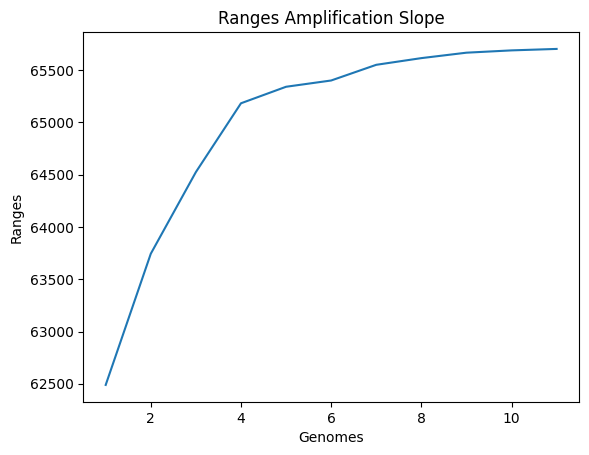

Genomes processed: 1 - Range: 62489
Genomes processed: 2 - Range: 63744
Genomes processed: 3 - Range: 64525
Genomes processed: 4 - Range: 65183
Genomes processed: 5 - Range: 65341
Genomes processed: 6 - Range: 65401
Genomes processed: 7 - Range: 65551
Genomes processed: 8 - Range: 65615
Genomes processed: 9 - Range: 65667
Genomes processed: 10 - Range: 65689
Genomes processed: 11 - Range: 65703
Genome 1 has 62450 alleles
Genome 2 has 113440 alleles
Genome 3 has 169153 alleles
Genome 4 has 220328 alleles
Genome 5 has 270823 alleles
Genome 6 has 316518 alleles
Genome 7 has 364663 alleles
Genome 8 has 407113 alleles
Genome 9 has 449733 alleles
Genome 10 has 490282 alleles
Genome 11 has 531190 alleles
Swap rate between 2 and 1 is 1.8164931945556446
Swap rate between 3 and 2 is 1.491123060648801
Swap rate between 4 and 3 is 1.302536756664085
Swap rate between 5 and 4 is 1.229181039177953
Swap rate between 6 and 5 is 1.1687264375625408
Swap rate between 7 and 6 is 1.1521082529271638
Swap rat

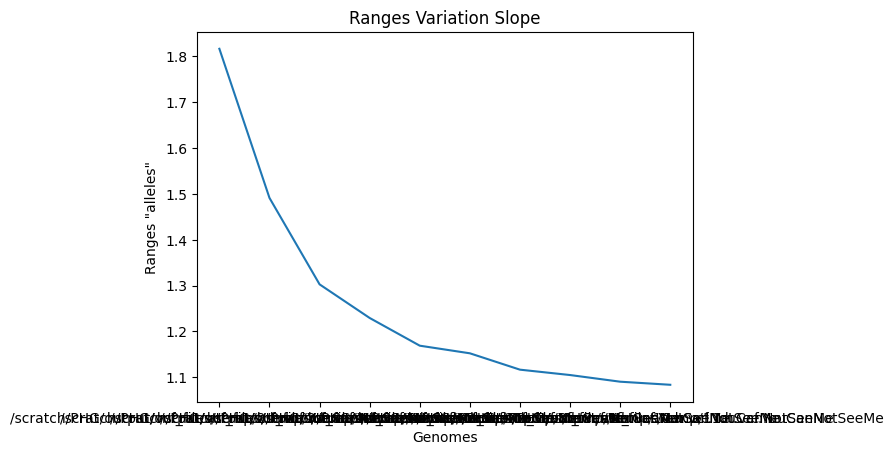

In [10]:
if __name__ == "__main__":
    try:
        ___main___()
    except KeyboardInterrupt:
        print("Script interrupted by user. Exiting...")
        shutil.rmtree(temp_folder)
        sys.exit(0)
        raise KeyboardInterrupt
        

